In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from NN_module.neural_network import NN
from NN_module.layers import Dense

X :  [[ 54 -69]
 [ 29 -16]
 [ 80  59]
 [-90  32]
 [ 56 -32]
 [-77 -52]]
Y :  [[1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]]


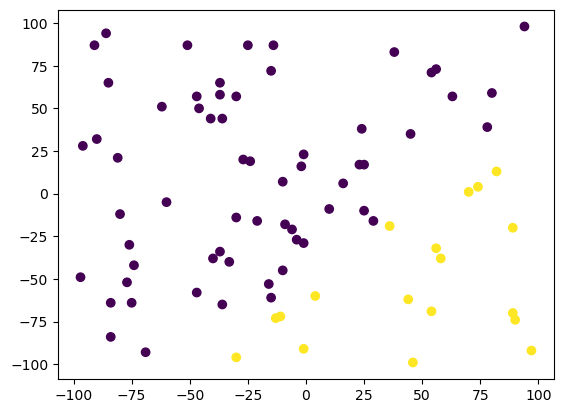

result
Y_test :  [[1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Y_predict :  [[1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
accuracy :  1.0


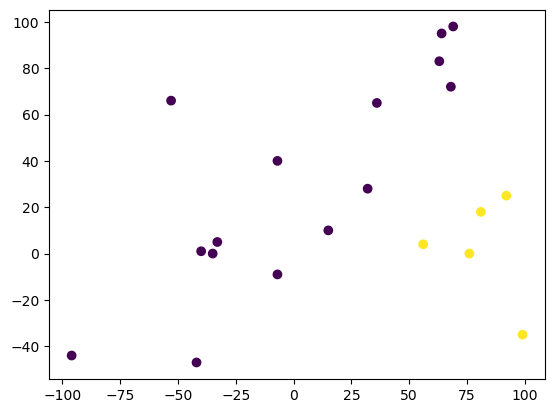

In [23]:
 l=100

 X = np.array(np.random.randint(-1*l,l,(l,2)),ndmin=2)
 print('X : ', X[:6 , :])
 Y = []
 for i in range(l) :
     if X[i,0] > X[i,1] + (l/2) :
         Y.append(1.0)
     else :
         Y.append(0)
 Y=np.array(Y, ndmin=2)
 Y=Y.T
 split = int(l*0.8)
 X_train = X[:split , :]
 Y_train = Y[:split , :]
 print('Y : ',Y_train[:6, :])

 X_test = X[split: , :]
 Y_test = Y[split: , :]

 plt.scatter(X_train[: , 0] , X_train[: , 1],c = Y_train[: , 0])
 plt.show()
'''
X_train =np.array([[2,3],
             [4,5],
             [6,1],
             [2,0]])
Y_train = np.array([[1],[1],[0],[0]])

X_test =np.array([[4,6],
             [8,5]])
Y_test = np.array([1,0])
'''


model = NN([
            Dense(units=2 , activation='relu',weights_regularizer_l1=0.2),
            Dense(units=1 , activation='sigmoid')
            ] 
            , loss = 'binaryCrossentropy' )

model.fit(X_train, Y_train , epochs=1000 ,learning_rate=0.1, get_log=False)

 Y_predict = model.predict(X_test)
 Y_predict[Y_predict >= 0.5 ] = 1
 Y_predict[Y_predict < 0.5 ] = 0
 Y_predict
 print('result')
(Y_test == Y_predict).all()
 print('Y_test : ',Y_test.T)
 print('Y_predict : ',Y_predict.T)
 l1 = Y_test.shape[0]
 incorrect = 0 
 for i in range(l1) :
     if (Y_predict[i,0] != Y_test[i,0]) :
         incorrect +=1

 accuracy = (l1 - incorrect) / l1 
 print('accuracy : ' , accuracy)

 plt.scatter(X_test[:,0],X_test[:,1],c=Y_predict)


In [17]:
layer1 = model.layers[0]
layer1.inputs

array([[-464,  -77],
       [-122,  -74],
       [  56, -262],
       [ -88, -130],
       [ -14,   63],
       [ 230, -435],
       [ 392,  -43],
       [-377,  213],
       [-483, -421],
       [ 123, -229],
       [-490,   71],
       [-500,  118],
       [  46, -359],
       [ 381,   28],
       [   6,  383],
       [ 443,  -63],
       [-235, -224],
       [-136,  376],
       [-411, -224],
       [-134,  244],
       [-440, -211],
       [-156,   98],
       [ 192,  310],
       [ 485,  253],
       [-495,  366],
       [-411, -124],
       [ 339,  261],
       [ 159,  125],
       [ 482, -354],
       [ 174,  134],
       [-181,  364],
       [ 192, -266],
       [-390, -480],
       [ 312,  480],
       [ 111, -467],
       [-430,  499],
       [-159,   91],
       [-455, -137],
       [-353,  341],
       [ 135,  235],
       [-120,  -32],
       [ -79,  445],
       [ 394,  196],
       [  -8,   17],
       [-283, -273],
       [  68,  319],
       [-154,  105],
       [  78,

In [11]:
layer1.outputs

array([[0.49084196],
       [0.48402426],
       [0.49121933],
       [0.49785181]])

In [12]:
layer1.g.activate(layer1.inputs @ layer1.W + layer1.b)

array([[0.49084196],
       [0.48402426],
       [0.49121933],
       [0.49785181]])

In [14]:
grad = layer1.g.get_g_grad(layer1.outputs)
grad

array([[0.24991613],
       [0.24974478],
       [0.2499229 ],
       [0.24999539]])

In [16]:
model.J.compute_cost(layer1.outputs, Y_train)

array([-0.48168186, -0.46803763, -0.48243685, -0.49570359])

In [11]:
X = np.array((1,0,-3,4,5,6,-7,8,9,0,-6,5,-23,12,45,-6576,-23,7,76,6,54,-34,23,-23),ndmin=2)
X = np.resize(X, (6,4))
X

array([[    1,     0,    -3,     4],
       [    5,     6,    -7,     8],
       [    9,     0,    -6,     5],
       [  -23,    12,    45, -6576],
       [  -23,     7,    76,     6],
       [   54,   -34,    23,   -23]])

In [13]:
func = lambda x : max(0,x)
f = np.vectorize(func)
X_new = f(X)
X_new

array([[ 1,  0,  0,  4,  5],
       [ 6,  0,  8,  9,  0],
       [ 0,  5,  0, 12, 45],
       [ 0, 34,  0,  7, 76],
       [ 6, 54,  0, 23,  0]])

In [4]:
relu_diff = lambda x : 1 if x>0 else 0
relu_diff = np.vectorize(relu_diff)
relu_diff(X)

array([[1, 0, 0, 1, 1],
       [1, 0, 1, 1, 0],
       [0, 1, 0, 1, 1],
       [0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0]])

In [12]:
g_z = X
s = np.array(np.sum(g_z,axis=1),ndmin=2)
print(s)
print('\n')
g_z = g_z/s.T
g_z

[[    2    12     8 -6542    66    20]]




array([[ 5.00000000e-01,  0.00000000e+00, -1.50000000e+00,
         2.00000000e+00],
       [ 4.16666667e-01,  5.00000000e-01, -5.83333333e-01,
         6.66666667e-01],
       [ 1.12500000e+00,  0.00000000e+00, -7.50000000e-01,
         6.25000000e-01],
       [ 3.51574442e-03, -1.83430144e-03, -6.87863039e-03,
         1.00519719e+00],
       [-3.48484848e-01,  1.06060606e-01,  1.15151515e+00,
         9.09090909e-02],
       [ 2.70000000e+00, -1.70000000e+00,  1.15000000e+00,
        -1.15000000e+00]])